Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
phi = poly.fit_transform(X)
phi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje
product = phi.transpose().dot(phi)
inverse = linalg.inv(product)
w = inverse.dot(phi.transpose()).dot(y)
print(w)

w = np.linalg.pinv(phi).dot(y)
print(w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

2.042857142857143

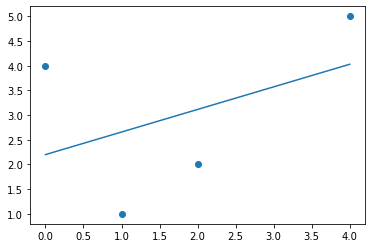

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje

h = []
for x in phi:
    h.append( w.transpose().dot(x) )
    
plt.scatter(X, y)
plt.plot(X, h, '-')
mean_squared_error(y, h)

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje
np.linalg.inv(phi).dot(y)

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

reg = LinearRegression().fit(X, y)
reg.coef_

array([0.45714286])

In [8]:
reg.intercept_

2.2

In [9]:
prediction = reg.predict(X)
prediction_error = mean_squared_error(prediction, y)
print(prediction)
print(prediction_error)

[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [10]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    y = []
    for xi in X: 
        y.append(f(xi)+normal(scale=noise))
    return y

In [11]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [12]:
# Vaš kôd ovdje
def f(xi): 
    result = 5 + xi - 2*(xi**2) - 5*(xi**3)
    return result

X = make_instances(-5, 5, 50)
noise = 200
y = make_labels(X, f, noise)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

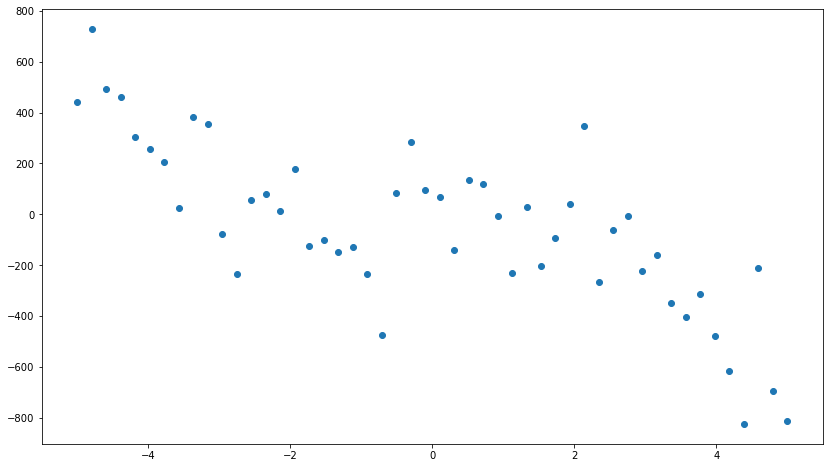

In [13]:
# Vaš kôd ovdje
plt.figure(figsize=[14, 8])
# plt.plot(X, f(X), 'r')
plt.scatter(X, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

pogreska ucenja:  28959.85099464811


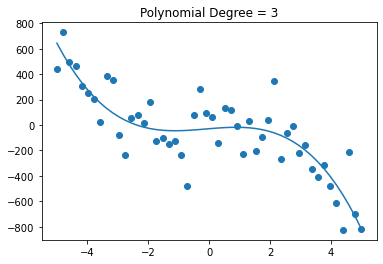

In [14]:
# Vaš kôd ovdje
poly_features = PolynomialFeatures(degree = 3)  
X_poly = poly_features.fit_transform(X)

poly_model = LinearRegression()  
poly_model.fit(X_poly, y)
pred = poly_model.predict(X_poly)

plt.scatter(X,y)
plt.title("Polynomial Degree = 3")

# w = np.linalg.pinv(X_poly).dot(y)
# h = []

# for x in X_poly:
#     h.append( w.transpose().dot(x) )

from sklearn.metrics import mean_squared_error
print("pogreska ucenja: ", mean_squared_error(y, pred))

new_X, new_y = zip(*sorted(zip(X, pred)))
plt.plot(new_X, new_y)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

pogreska ucenja za d = 1 :  46927.986443389076
pogreska ucenja za d = 3 :  28959.85099464811
pogreska ucenja za d = 5 :  27863.27227148473
pogreska ucenja za d = 10 :  24697.706766975276
pogreska ucenja za d = 20 :  16581.152254606477


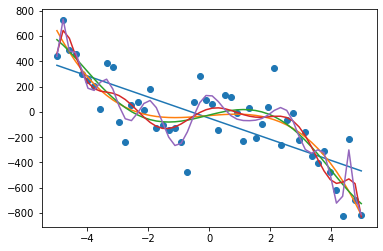

In [15]:
# Vaš kôd ovdje
plt.scatter(X,y)

for i in (1, 3, 5, 10, 20):
    poly_features = PolynomialFeatures(degree = i)  
    X_poly = poly_features.fit_transform(X)

    poly_model = LinearRegression()  
    poly_model.fit(X_poly, y)
    pred = poly_model.predict(X_poly)

    new_X, new_y = zip(*sorted(zip(X, pred)))
    plt.plot(new_X, new_y)
    
    print("pogreska ucenja za d =", i, ": ", mean_squared_error(y, pred))

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

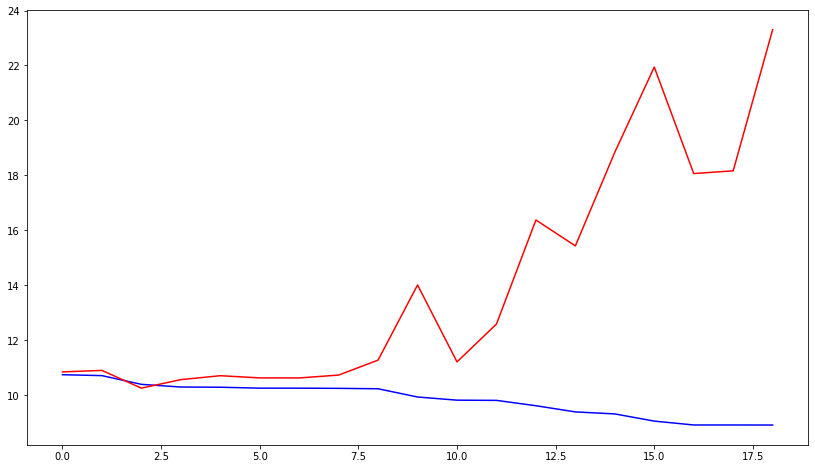

In [17]:
linear_regression = LinearRegression()
train_errors = []; test_errors = []

for i in range(1, 20):
    polynomial_features = PolynomialFeatures(i)
    
    design_matrix_train = polynomial_features.fit_transform(X_train)
    design_matrix_test = polynomial_features.fit_transform(X_test)
    
    linear_regression.fit(design_matrix_train, y_train)
    
    h_test = linear_regression.predict(design_matrix_test)
    h_train = linear_regression.predict(design_matrix_train)
    
    train_errors.append(log(mean_squared_error(h_train, y_train)))
    test_errors.append(log(mean_squared_error(h_test, y_test)))

plt.figure(figsize=[14,8])
plt.plot(train_errors, 'b'); plt.plot(test_errors, 'r')

In [18]:
# for current_X, current_y, color in [(X_train, y_train, 'b'), (X_test, y_test,'r')]:
# # current_X, current_y = X_train, y_train
# # plt.scatter(current_X, current_y)
#     E = []
#     for i in range(1, 20):
#         poly_features = PolynomialFeatures(degree = i)  
#         X_poly = poly_features.fit_transform(current_X)

#         poly_model = LinearRegression()  
#         poly_model.fit(X_poly, current_y)
#         pred = poly_model.predict(X_poly)

#     #     new_X, new_y = zip(*sorted(zip(X, pred)))
#     #     plt.plot(new_X, new_y)

#         E.append(mean_squared_error(current_y, pred))

#     plt.plot(np.log(E), color)

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

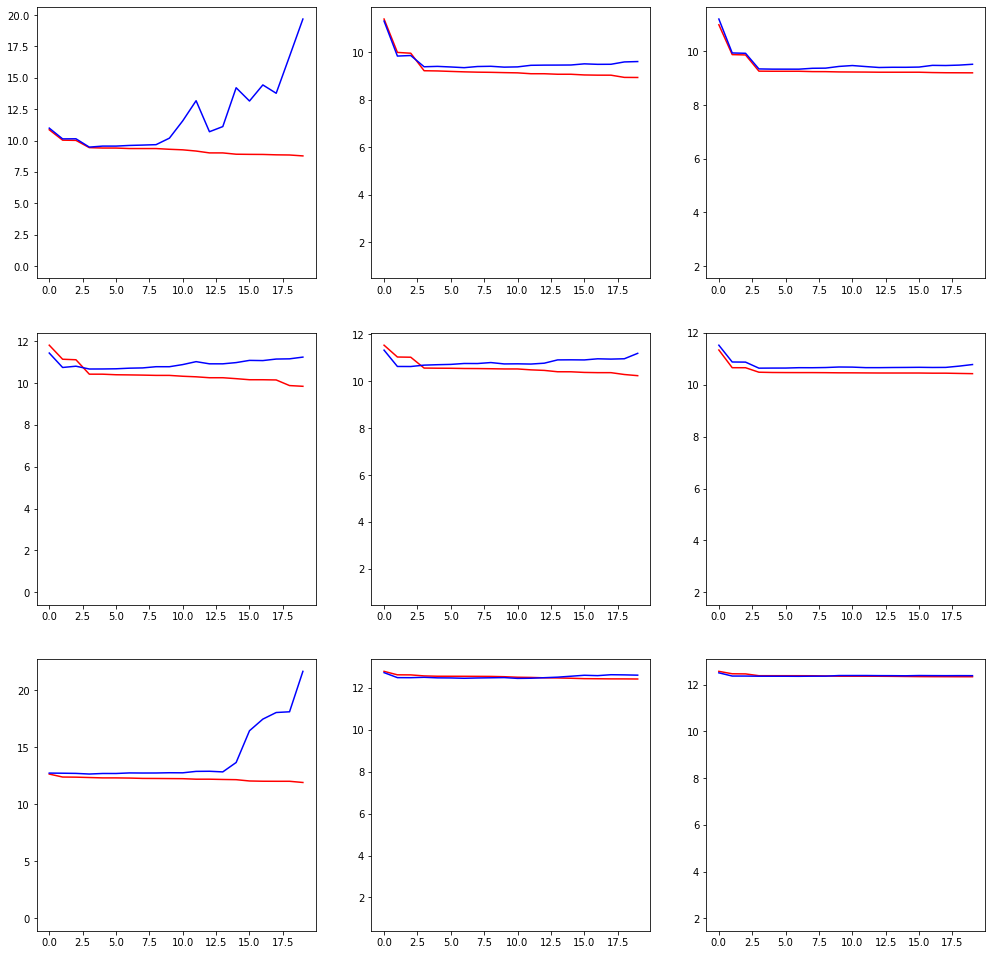

In [39]:
# Vaš kôd ovdje

fig, axs = plt.subplots(3,3, figsize=(17,17))
X = make_instances(-5, 5, 1000)
# plt.subplots_adjust(wspace=0.7, hspace=0.7)

# generiranje 1000 primjera
def f(xi): 
    result = 5 + xi - 2*(xi**2) - 5*(xi**3)
    return result

for i, noise in enumerate([100, 200, 500]):
    y = make_labels(X, f, noise)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    y_train = np.array(y_train); y_test = np.array(y_test)
#     X_train_third, X_train_two_thirds, y_train_third, y_train_two_thirds = train_test_split(X_train, y_train, test_size=(2./3))
#     X_test_third, X_test_two_thirds, y_test_third, y_test_two_thirds = train_test_split(X_test, y_test, test_size=(2./3))
    
#     combinations = [
#         ((X_train_third, y_train_third), (X_test_third, y_test_third)),
#         ((X_train_two_thirds, y_train_two_thirds), (X_test_two_thirds, y_test_two_thirds)),
#         ((X_train, y_train), (X_test, y_test))
#     ]

#     for j, (current_train, current_test) in enumerate(combinations):
        
#         for current_X, current_y, color in [(current_train[0], current_train[1], 'tab:blue'), (current_test[0], current_test[1],'tab:red')]:
#     lin_reg = LinearRegression()
    for j, size in enumerate([100, 200, 500]):
        errors_test = []
        errors_train = []
        
        half_size = int(size/2); interval = range(500)
        train = random.choice(interval, half_size, replace=False)
        test = random.choice(interval, half_size, replace=False)
        
        for d in range(20):
            
#             poly = PolynomialFeatures(d)
#             designMatrix = poly.fit_transform(X)

#             designMatrix_plus = linalg.pinv(designMatrix)
#             w = designMatrix_plus.dot(y)
#             y_pred = designMatrix.dot(w)
            
#             - TRAIN -
            poly_features = PolynomialFeatures(degree = d)  
            X_poly_train = poly_features.fit_transform(X_train[train])
#             X_poly_test = poly_features_test.fit_transform(X_test[test])
            
#             lin_reg.fit(X_poly_train, y_train[train])
#             prediction_y_train = lin_reg.predict(X_poly_train)
#             prediction_y_test = lin_reg.predict(X_poly_test)
            
            w = linalg.pinv(X_poly_train).dot(y_train[train])
            prediction_y_train = X_poly_train.dot(w)
            
#             - PREDICT -
            poly_features_test = PolynomialFeatures(degree = d) 
            X_poly_test = poly_features_test.fit_transform(X_test[test])
            prediction_y_test = X_poly_test.dot(w)
            
#             - ERROR - 
            e_train = mean_squared_error(y_train[train], prediction_y_train)
            e_test = mean_squared_error(y_test[test], prediction_y_test)
        
            errors_train.append(e_train)
            errors_test.append(e_test)

#             poly_model = LinearRegression()  
#             poly_model.fit(X_poly, current_y)
#             pred = poly_model.predict(X_poly)

#             E.append(mean_squared_error(current_y, pred))

        axs[i, j].plot(i, j, np.log(errors_train), 'r')
        axs[i, j].plot(i, j, np.log(errors_test), 'b')

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [113]:
# Vaš kôd ovdje

#podaci
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

#phi
poly = PolynomialFeatures(3)  
phi = poly.fit_transform(X)

#tezine
for l in (0, 1, 10):
    w = linalg.inv(phi.transpose().dot(phi) + l*np.identity(4)).dot(phi.transpose().dot(y))
    print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [115]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for a in (0, 1, 10):
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(phi, y)
    
    print(ridge.intercept_, ridge.coef_)

0.0 [ 4.         -5.91666667  3.375      -0.45833333]
0.0 [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
0.0 [0.43312265 0.11060671 0.13827839 0.03093411]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

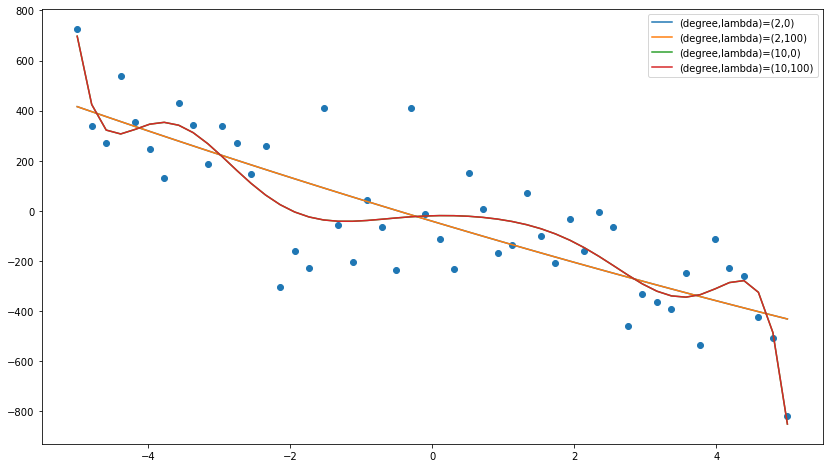

In [48]:
# Vaš kôd ovdje
def f(xi): 
    result = 5 + xi - 2*(xi**2) - 5*(xi**3)
    return result

X = make_instances(-5, 5, 50)
noise = 200
y = make_labels(X, f, noise)

plt.figure(figsize=(14, 8))
plt.scatter(X, y)


for d in [2, 10]:
    for l in [0, 100]:

        poly_features = PolynomialFeatures(degree = d)  
        phi = poly_features.fit_transform(X)

        poly_model = LinearRegression()  
        poly_model.fit(phi, y)
        pred = poly_model.predict(phi)

        w = linalg.inv(phi.transpose().dot(phi) + l*np.identity(d+1)).dot(phi.transpose().dot(y))
#         h = []
        
#         for x in phi: 
#              h.append(w.transpose().dot(x))
        plt.plot(X, pred, '-', label='(degree,lambda)=('+str(d)+','+str(l)+')')
        

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


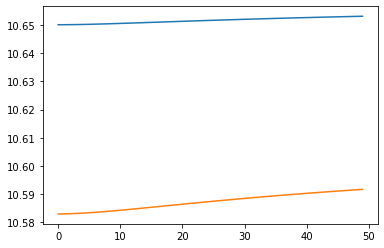

In [22]:
# Vaš kôd ovdje
d = 10
X = make_instances(-5, 5, 1000)
noise = 200
y = make_labels(X, f, noise)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for current_X, current_y in [(X_train, y_train), (X_test, y_test)]:
    E = []
    for l in range(50):
        poly_features = PolynomialFeatures(degree = d)  
        phi = poly_features.fit_transform(current_X)

        poly_model = LinearRegression()  
        poly_model.fit(phi, current_y)
        pred = poly_model.predict(phi)

        w = linalg.inv(phi.transpose().dot(phi) + l*np.identity(d+1)).dot(phi.transpose().dot(current_y))
        h = []

        for x in phi: 
             h.append(w.transpose().dot(x))

        E.append(mean_squared_error(current_y, h))

    plt.plot(np.log(E))

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [23]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [50]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

l0 = []
l1 = []
l2 = []

for l in range(1, 100): 
    poly_features = PolynomialFeatures(degree = 10)  
    phi = poly_features.fit_transform(X_train)
    w = linalg.inv(phi.transpose().dot(phi) + l*np.identity(d+1)).dot(phi.transpose().dot(y_train))
    
    ridge = Ridge(alpha=l)
    ridge.fit(phi, y_train)
    
    coef = ridge.coef_[0]
    l0_norme = nonzeroes(coef)
    
    l1_norme = 0
    for c in coef:
        l1_norme += np.abs(c)
    
    l2_norme = np.sqrt(coef.transpose().dot(coef))
    
    l0.append(l0_norme)
    l1.append(l1_norme)
    l2.append(l2_norme)
    
plt.plot(l0)
plt.plot(l1)
plt.plot(l2)

NameError: name 'nonzeroes' is not defined

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

/Users/dunjaacimovic/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61356065.96093711, tolerance: 14884.841228556475
  model = cd_fast.enet_coordinate_descent(
/Users/dunjaacimovic/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61348493.32925316, tolerance: 14884.841228556475
  model = cd_fast.enet_coordinate_descent(
/Users/dunjaacimovic/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61339294.266018644, tolerance: 14884.841228556475
  model = cd_fast.enet_coordinate_descent(
/Users/dunja

ValueError: setting an array element with a sequence.

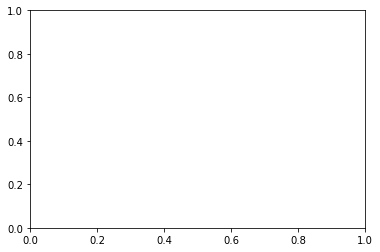

In [49]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

from sklearn.linear_model import Lasso

l0 = []
l1 = []
l2 = []

for l in range(1, 100): 
    poly_features = PolynomialFeatures(degree = 10)  
    phi = poly_features.fit_transform(X_train)
    
    lasso = Lasso(alpha=l)
    lasso.fit(phi, y_train)
    
    coef = lasso.coef_
    l0_norme = np.nonzero(coef)
    
    l1_norme = 0
    for c in coef:
        l1_norme += np.abs(c)
    
    l2_norme = np.sqrt(coef.transpose().dot(coef))
    
    l0.append(l0_norme)
    l1.append(l1_norme)
    l2.append(l2_norme)

plt.plot(l0)
plt.plot(l1)
plt.plot(l2)

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [74]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

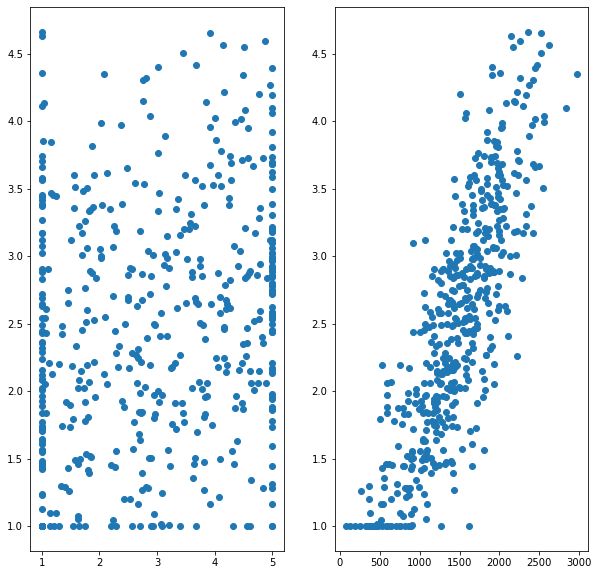

In [75]:
# Vaš kôd ovdje
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].scatter(grade_in_highschool, grades_y)
axs[1].scatter(exam_score, grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [78]:
# Vaš kôd ovdje
ridge = Ridge(alpha=0.01)
ridge.fit(grades_X, grades_y)
y_pred = ridge.predict(grades_X)
print(ridge.coef_)

[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [101]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
# grades_X_fixed = StandardScaler().fit_transform(grades_X)
# grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1,1))

scaler = StandardScaler(with_mean= False)
grades_fixed = scaler.fit_transform(np.c_[grades_X, grades_y])
grades_X_fixed = grades_fixed[:,:2]
grades_y_fixed = grades_fixed[:, 2]

ridge.fit(grades_X_fixed, grades_y_fixed)
prediction_y = ridge.predict(grades_X_fixed)

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [104]:
# Vaš kôd ovdje
# to_add = []
# for g in grades_X_fixed[:, 1]:
#     to_add.append([g])
# np.hstack([grades_X_fixed, to_add])
lastColumn = [grades_X_fixed.T[-1]]
grades_X_fixed_colinear = np.hstack((grades_X_fixed,np.array(lastColumn).T))
print(grades_X_fixed_colinear)

[[3.74614996 1.28767708 1.28767708]
 [2.29207745 1.57182573 1.57182573]
 [3.98148012 1.55162405 1.55162405]
 ...
 [2.47957628 2.8744981  2.8744981 ]
 [3.60839572 3.32158813 3.32158813]
 [2.77613054 3.29105291 3.29105291]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [111]:
# Vaš kôd ovdje
ridge = Ridge(alpha=0.01)
ridge.fit(grades_X_fixed_colinear, grades_y)
prediction_y = ridge.predict(grades_X_fixed_colinear)
print(ridge.coef_)

[0.73954673 0.06870839 0.06870839]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [25]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.